# JOBSHEET 11 - CONVOLUTIONAL NEURAL NETWORK (CNN)

#### Nama: Magfiroh Indah Karisma
#### NIM: 2141720180

## PRAKTIKUM 1: Klasifikasi 🐱 dan 🐶


### Langkah 1 - Import Library

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Langkah 2 - Pra Pengolahan Data
Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

#### Langkah 2.1. Pra Pengolahan Data Training

In [3]:
# Membuat ImageDataGenerator untuk augmentasi data latih
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi piksel ke dalam rentang 0-1
    shear_range=0.2,  # Rentang pergeseran sudut untuk transformasi shear
    zoom_range=0.2,  # Rentang zoom untuk augmentasi
    horizontal_flip=True  # Flip horizontal gambar secara acak
)

# Memuat data latih dari direktori 'dataset/training_set' dengan menggunakan generator
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/data/dataset/training_set',  # Direktori data latih
    target_size=(64, 64),  # Mengubah gambar ke ukuran 64x64 piksel
    batch_size=32,  # Ukuran batch untuk pelatihan
    class_mode='binary'  # Mode kelas untuk klasifikasi biner
)

Found 8000 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
# Menggunakan ImageDataGenerator untuk memproses data pengujian
test_datagen = ImageDataGenerator(rescale = 1./255)

# Memuat data pengujian dari direktori '/content/drive/MyDrive/data/dataset/test_set'
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN
#### Langkah 3.1.  - Inisiasi Model CNN

In [5]:
# Membuat model Sequential dari Keras untuk digunakan dalam membuat arsitektur jaringan saraf konvolusional (CNN)
cnn = tf.keras.models.Sequential()

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
# Menambahkan layer konvolusional pertama ke dalam model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
# Menambahkan layer MaxPooling ke dalam model CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
# Menambahkan layer konvolusi kedua ke dalam model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Menambahkan layer MaxPooling, yang berperan dalam mereduksi dimensi spasial dari output yang dihasilkan oleh layer konvolusi sebelumnya
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [9]:
# Menambahkan layer Flatten ke dalam model
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
# Menambahkan layer Dense ke dalam model dengan 128 unit neuron dan menggunakan fungsi aktivasi ReLU
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
# Menambahkan layer Dense terakhir ke dalam model dengan 1 unit neuron yang menggunakan fungsi aktivasi sigmoid
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [12]:
# Mengkompilasi model CNN. Pengoptimal yang digunakan adalah 'adam', fungsi loss yang dipilih adalah 'binary_crossentropy' (cocok untuk tugas klasifikasi biner), dan metrics yang dipantau adalah akurasi.
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.
### Langkah 4 - Fit CNN

In [14]:
# Melakukan pelatihan model CNN dengan menggunakan data pelatihan dari training_set dan menggunakan data validasi dari test_set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 597s 2s/step - loss: 0.5868 - accuracy: 0.6866 - val_loss: 0.5711 - val_accuracy: 0.7130
Epoch 2/25
250/250 [==============================] - 41s 163ms/step - loss: 0.5477 - accuracy: 0.7195 - val_loss: 0.5138 - val_accuracy: 0.7560
Epoch 3/25
250/250 [==============================] - 36s 145ms/step - loss: 0.5266 - accuracy: 0.7361 - val_loss: 0.5187 - val_accuracy: 0.7565
Epoch 4/25
250/250 [==============================] - 37s 148ms/step - loss: 0.5046 - accuracy: 0.7509 - val_loss: 0.4970 - val_accuracy: 0.7590
Epoch 5/25
250/250 [==============================] - 42s 168ms/step - loss: 0.4779 - accuracy: 0.7675 - val_loss: 0.4757 - val_accuracy: 0.7750
Epoch 6/25
250/250 [==============================] - 48s 193ms/step - loss: 0.4724 - accuracy: 0.7740 - val_loss: 0.4829 - val_accuracy: 0.7670
Epoch 7/25
250/250 [==============================] - 40s 159ms/step - loss: 0.4554 - accuracy: 0.7799 - val_loss: 0.4678 - val_accu

### Langkah 5 - Prediksi dengan 1 Citra
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [16]:
# Import library yang diperlukan
import numpy as np
from keras.preprocessing import image

# Load gambar dan konversi menjadi array
test_image = image.load_img('/content/drive/MyDrive/data/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Prediksi menggunakan model CNN
result = cnn.predict(test_image)

# Mendapatkan label kelas dari data pelatihan
training_set.class_indices

# Menentukan prediksi berdasarkan hasil probabilitas dari model
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 151ms/step


## PRAKTIKUM 2 : Klasifikasi Multi-label dengan Data CIFAT

### Langkah 1 - Load Library

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [18]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel agar berada di rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Langkah 3 - Verifikasi Data

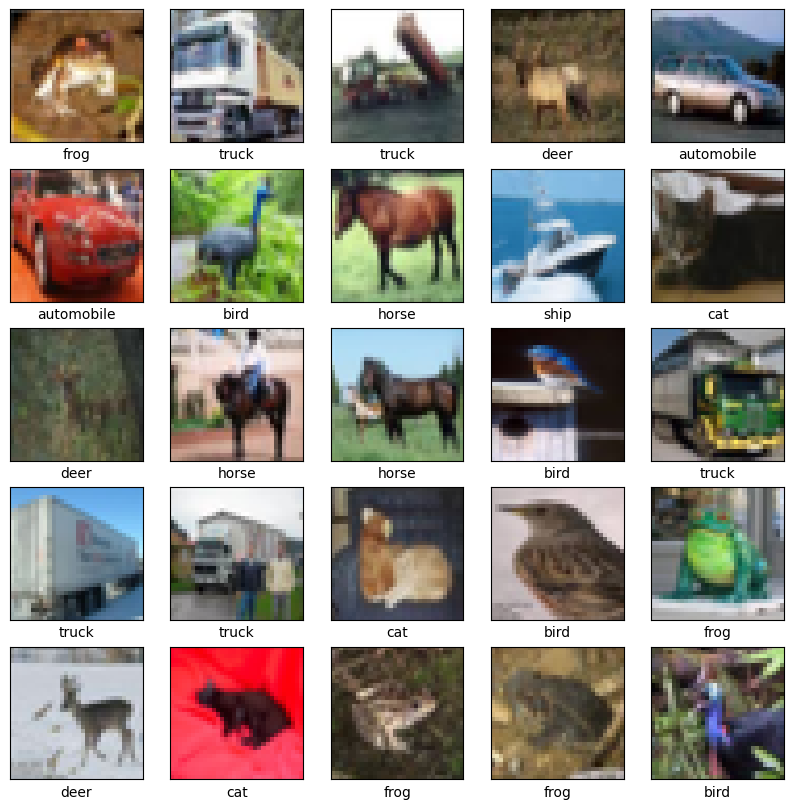

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Buat figure (gambar) berukuran 10x10
plt.figure(figsize=(10,10))

# Loop untuk menampilkan 25 gambar
for i in range(25):
    # Atur posisi subplot dan hapus grid
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Hapus label sumbu x
    plt.yticks([]) # Hapus label sumbu y
    plt.grid(False) # Matikan grid pada gambar

    # Tampilkan gambar pada indeks ke-i dari train_images
    plt.imshow(train_images[i])

    # Label sumbu x adalah nama kelas berdasarkan train_labels
    # CIFAR labels berupa array, sehingga membutuhkan indeks tambahan
    plt.xlabel(class_names[train_labels[i][0]])

# Tampilkan gambar
plt.show()

### Langkah 4 - Buat Model CNN
#### Langkah 4.1. - Buat Layer Konvolusi

In [20]:
model = models.Sequential()  # Membuat model Sequential baru

# Menambahkan layer Conv2D dengan 32 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
# Input shape diatur sebagai (32, 32, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Menambahkan layer MaxPooling2D dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer MaxPooling2D dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [21]:
# Mendapatkan ringkasan dari arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [22]:
model.add(layers.Flatten())  # Meratakan output dari layer sebelumnya menjadi vektor satu dimensi.
model.add(layers.Dense(64, activation='relu'))  # Menambahkan layer Dense dengan 64 unit dan fungsi aktivasi ReLU.
model.add(layers.Dense(10))  # Menambahkan layer Dense dengan 10 unit, tanpa fungsi aktivasi (linier).

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### Langkah 4.5. - Compile Model CNN

In [24]:
model.compile(
    optimizer='adam',  # Menggunakan algoritma optimasi Adam untuk menyesuaikan bobot model.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Menggunakan fungsi kerugian Sparse Categorical Crossentropy.
    metrics=['accuracy']  # Menggunakan metrik akurasi untuk mengevaluasi performa model.
)

### Langkah 5 - Fit Model

In [25]:
history = model.fit(
    train_images, train_labels,  # Data pelatihan yang digunakan untuk melatih model.
    epochs=10,  # Jumlah epoch (iterasi) yang digunakan saat melatih model.
    validation_data=(test_images, test_labels)  # Data validasi untuk mengevaluasi model setelah setiap epoch.
)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4885 - accuracy: 0.4580 - val_loss: 1.2442 - val_accuracy: 0.5549
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1288 - accuracy: 0.6023 - val_loss: 1.0868 - val_accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9860 - accuracy: 0.6539 - val_loss: 0.9648 - val_accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8944 - accuracy: 0.6877 - val_loss: 0.9504 - val_accuracy: 0.6634
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8293 - accuracy: 0.7098 - val_loss: 0.8910 - val_accuracy: 0.6912
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7701 - accuracy: 0.7317 - val_loss: 0.9178 - val_accuracy: 0.6809
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7242 - accuracy: 0.7469 - val_loss: 0.8997 - val_accuracy

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8732 - accuracy: 0.7104 - 940ms/epoch - 3ms/step


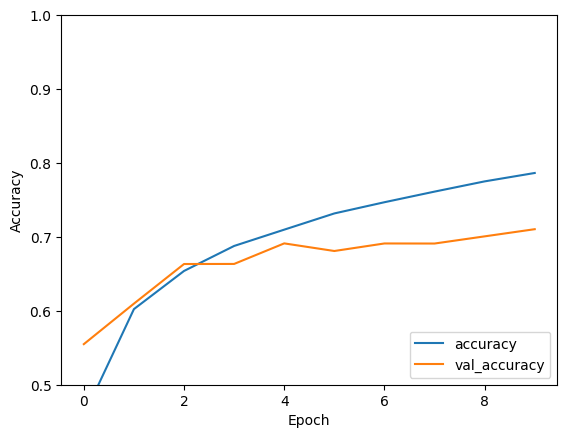

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')  # Plotting akurasi pada data pelatihan terhadap epoch.
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plotting akurasi pada data validasi terhadap epoch.
plt.xlabel('Epoch')  # Label pada sumbu X menunjukkan jumlah epoch.
plt.ylabel('Accuracy')  # Label pada sumbu Y menunjukkan nilai akurasi.
plt.ylim([0.5, 1])  # Rentang nilai pada sumbu Y (akurasi) dari 0.5 hingga 1.
plt.legend(loc='lower right')  # Menampilkan legenda pada lokasi pojok kanan bawah.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # Evaluasi performa model pada data pengujian.

### Langkah 7 - Cetak Hasil Akurasi

In [27]:
print(test_acc)

0.7103999853134155


## Tugas
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

Epoch 1/25
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5921 - accuracy: 0.4100 - val_loss: 1.2412 - val_accuracy: 0.5487
Epoch 2/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2015 - accuracy: 0.5694 - val_loss: 1.0752 - val_accuracy: 0.6140
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0313 - accuracy: 0.6379 - val_loss: 0.9397 - val_accuracy: 0.6704
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9209 - accuracy: 0.6781 - val_loss: 0.9074 - val_accuracy: 0.6875
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8430 - accuracy: 0.7051 - val_loss: 0.9142 - val_accuracy: 0.6853
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7906 - accuracy: 0.7239 - val_loss: 0.8518 - val_accuracy: 0.7135
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7390 - accuracy: 0.7437 - val_loss: 0.8125 - val_accurac

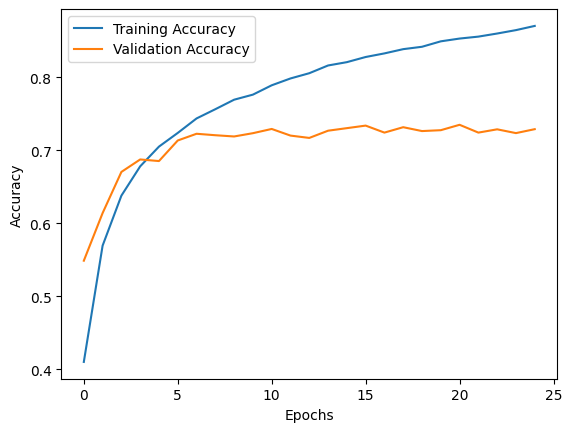

In [29]:
# Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Muat dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalisasi nilai pixel menjadi antara 1 dan 0
train_images, test_images = train_images / 255.0, test_images / 255.0

# Tentukan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels))

# Tampilkan nilai akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Buatlah model CNN untuk klasifikasi dataset MNIST

import tensorflow as tf

# Muat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi nilai piksel menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data agar sesuai dengan model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Tentukan model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1313 - accuracy: 0.9595 - val_loss: 0.0446 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0510 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0264 - val_accuracy: 0.9930
